In [19]:

from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras import models
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
import numpy as np





In [20]:
#a) Importing the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3


In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# create labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [23]:
#b) Preprocessing the data
# Normalize dataset each pixel represented by value between 0 and 1
x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
x_train  = x_train/255
x_test  = x_test/255




#to_categorical y_train and y_test 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [24]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [27]:
#c) Building the model 
model = Sequential()

#• Set up the layers
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

#• Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m, precision_m, recall_m])

#d) Training the model.
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), verbose=0)

loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 64)         

In [28]:
#e) Making prediction on test set
y_predictions = model.predict(x_test).argmax(axis=1)
y_test = np.argmax(y_test,axis=1)


In [29]:
# f) Evaluating model performance on test set by plotting confusion matrix for each class, theprecision, the recall and accuracy metrics
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



[[752  10  84  16  11   8   9  12  61  37]
 [ 32 761  13   3   2   6  11   3  26 143]
 [ 68   2 654  67  48  39  57  45   8  12]
 [ 23   2  95 542  34 149  64  58  16  17]
 [ 11   2  98  72 598  41  59 106   8   5]
 [ 12   0  77 179  25 596  24  74   5   8]
 [  8   2  58  72  13  20 803  10   8   6]
 [ 23   1  40  42  35  43   2 797   1  16]
 [ 88  14  28  17   5   3   6   2 795  42]
 [ 27  28  11  16   4   2   6  12  30 864]]


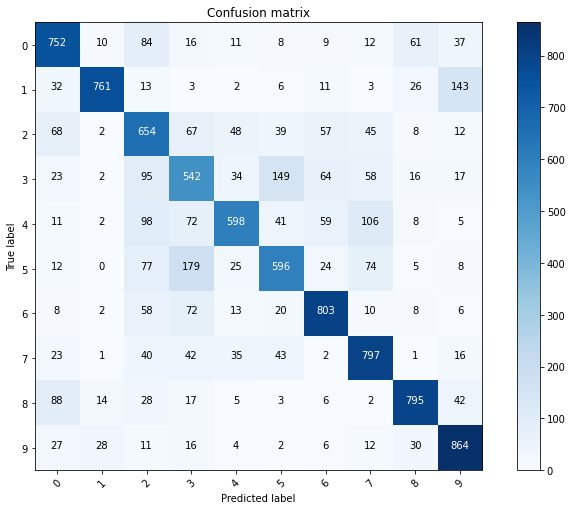

Confusion Matrix :
[[[8708  292]
  [ 248  752]]

 [[8939   61]
  [ 239  761]]

 [[8496  504]
  [ 346  654]]

 [[8516  484]
  [ 458  542]]

 [[8823  177]
  [ 402  598]]

 [[8689  311]
  [ 404  596]]

 [[8762  238]
  [ 197  803]]

 [[8678  322]
  [ 203  797]]

 [[8837  163]
  [ 205  795]]

 [[8714  286]
  [ 136  864]]]


In [30]:
cm = confusion_matrix(y_test,y_predictions)
print(cm)
plot_confusion_matrix(cm, list(range(10)))


results = multilabel_confusion_matrix(y_true=y_test, y_pred=y_predictions) 
print ('Confusion Matrix :')
print(results) 


In [31]:

from sklearn.metrics import classification_report
print(classification_report(y_test , y_predictions ))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1000
           1       0.93      0.76      0.84      1000
           2       0.56      0.65      0.61      1000
           3       0.53      0.54      0.54      1000
           4       0.77      0.60      0.67      1000
           5       0.66      0.60      0.63      1000
           6       0.77      0.80      0.79      1000
           7       0.71      0.80      0.75      1000
           8       0.83      0.80      0.81      1000
           9       0.75      0.86      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

